In [1]:
import json
with open('dna_bpe_tokenizer_offset.json', 'r') as f:
    data = json.load(f)
    vocab = data['model']['vocab']
    vocab = {key for key in vocab if vocab[key] > 4}

with open('dna_bpe_tokenizer_cutoff_rc.json', 'r') as f:
    data = json.load(f)
    vocab_rc = data['model']['vocab']
    vocab_rc = {key for key in vocab_rc if vocab_rc[key] > 4}

In [2]:
complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
def rev_comp(dna):
    dna = reversed(dna)
    dna = ''.join([complement[x] for x in dna])
    return dna


In [3]:
size_of_intersection = len(vocab.intersection(vocab_rc)) / len(vocab) * 100
print(f"Percentage of RC tokenizer tokens in non-RC vocabulary: {size_of_intersection:.0f}%")

Percentage of RC tokenizer tokens in non-RC vocabulary: 89%


In [4]:
diff = vocab_rc - vocab
pct = len(diff.intersection({rev_comp(x) for x in vocab})) / len(diff) * 100
print(f"Percentage of remaining tokens which are revcomp of some sequence in non-RC tokenizer: {pct:.0f}%")

Percentage of remaining tokens which are revcomp of some sequence in non-RC tokenizer: 41%


In [5]:
import matplotlib.pyplot as plt
lens = [len(x) for x in vocab_rc]
plt.hist(lens, bins=10)
plt.title("Length Distribution of RC Tokenizer")
plt.xlabel("Length of Sequence")
plt.ylabel("Number of Occurrences")
plt.show()

<Figure size 640x480 with 1 Axes>

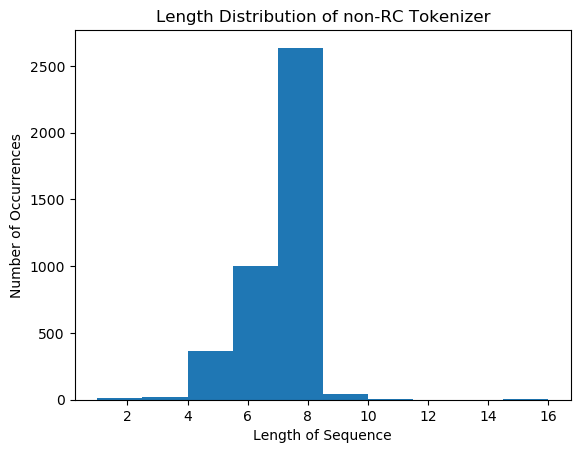

In [6]:
lens = [len(x) for x in vocab]
plt.hist(lens, bins=10)
plt.title("Length Distribution of non-RC Tokenizer")
plt.xlabel("Length of Sequence")
plt.ylabel("Number of Occurrences")
plt.show()